# Service Orders for Maintenance

### Data extracted from a base of Service Orders for Maintenance of its own fleet, in maintenance management spreadsheets of a fictitious environmental services company Bonis Ambiental. The data can be found at : __[Kaggle Dataset](https://www.kaggle.com/datasets/bonisvc/ordem-de-servico-da-manutencao)__

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

## Loading the data

In [2]:
file_name = 'manutsv.csv'
dataset = pd.read_csv(file_name, sep=';')

### Basic information about the Dataset

In [3]:
dataset.head()

,ordem_de_servico,tag_equipamento,tipo_de_equipamento,tipo_de_evento,tipo_de_manutencao,km_atual,hr_atual,data_entrada,hora_entrada,data_saida,hora_saida
0,1.0,CHV-13,CAMINHAO HIPERVACUO,Preventiva,PMP,"101.234,90","17.022,60",01/09/2021,11:15:00,02/09/2021,09:00:00
1,2.0,CHH-94,CAMINHAO HIPERVACUO HIDROJATO,Corretiva,Hidráulico,"9.911,60",431,01/09/2021,14:20:00,01/09/2021,14:35:00
2,3.0,RT-26,REBOQUE TANQUE,Corretiva,Diversos,0,0,01/09/2021,14:37:00,01/09/2021,15:00:00
3,4.0,CM-9,CAVALO MECANICO,Corretiva,Mecânico,"425.163,50","10.712,00",01/09/2021,15:10:00,01/09/2021,15:25:00
4,5.0,CHH-11,CAMINHAO HIPERVACUO HIDROJATO,Corretiva,Mecânico,"71.852,50","14.583,90",01/09/2021,15:55:00,01/09/2021,16:08:00


In [4]:
dataset.describe()

,ordem_de_servico
count,1023.000000
mean,510.750733
std,294.261628
min,1.000000
25%,256.500000
50%,511.000000
75%,764.500000
max,1020.000000


In [5]:
dataset.columns

Index(['ordem_de_servico', 'tag_equipamento', 'tipo_de_equipamento',
       'tipo_de_evento', 'tipo_de_manutencao', 'km_atual', 'hr_atual',
       'data_entrada', 'hora_entrada', 'data_saida', 'hora_saida'],
      dtype='object')

### Variable and they types

|Variável            | Tipo         |
|:------------------:|:------------:|
|ordem_de_servico    | Quantitativo |
|tag_equipamento     | Qualitativo  |
|tipo_de_equipamento | Qualitativo  |
|tipo_de_evento      | Qualitativo  |
|tipo_de_manutencao  | Qualitativo  |
|km_atual            | Quantitativo |
|hr_atual            | Quantitativo |
|data_entrada        | Quantitativo |
|hora_entrada        | Quantitativo |
|data_saida          | Quantitativo |
|hora_saida          | Quantitativo |

In [6]:
dataset.dtypes

ordem_de_servico       float64
tag_equipamento         object
tipo_de_equipamento     object
tipo_de_evento          object
tipo_de_manutencao      object
km_atual                object
hr_atual                object
data_entrada            object
hora_entrada            object
data_saida              object
hora_saida              object
dtype: object

In [7]:
for i in dataset.columns.tolist():
    print(f'{i} - {len(dataset[dataset[i].isnull()])}')

ordem_de_servico - 870
tag_equipamento - 870
tipo_de_equipamento - 870
tipo_de_evento - 870
tipo_de_manutencao - 870
km_atual - 1033
hr_atual - 1042
data_entrada - 871
hora_entrada - 913
data_saida - 878
hora_saida - 920


## Trating available data

In [8]:
datasetTrat = dataset.dropna()

In [9]:
datasetTrat['km_atual'].replace(r'[.]', '', regex=True, inplace=True)
datasetTrat['km_atual'].replace(r'[,]', '.', regex=True, inplace=True)
datasetTrat['km_atual'].replace(' ', '0', inplace=True)
datasetTrat['km_atual'] = datasetTrat['km_atual'].astype(float)

C:\Users\pedro\AppData\Local\Temp\ipykernel_12272\680057411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetTrat['km_atual'].replace(r'[.]', '', regex=True, inplace=True)
C:\Users\pedro\AppData\Local\Temp\ipykernel_12272\680057411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetTrat['km_atual'].replace(r'[,]', '.', regex=True, inplace=True)
C:\Users\pedro\AppData\Local\Temp\ipykernel_12272\680057411.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [10]:
datasetTrat['hr_atual'].replace(r'[.]', '', regex=True, inplace=True)
datasetTrat['hr_atual'].replace(r'[,]', '.', regex=True, inplace=True)
datasetTrat['hr_atual'].replace(' ', '0', inplace=True)
datasetTrat['hr_atual'] = datasetTrat['hr_atual'].astype(float)

C:\Users\pedro\AppData\Local\Temp\ipykernel_12272\1824900478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetTrat['hr_atual'].replace(r'[.]', '', regex=True, inplace=True)
C:\Users\pedro\AppData\Local\Temp\ipykernel_12272\1824900478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetTrat['hr_atual'].replace(r'[,]', '.', regex=True, inplace=True)
C:\Users\pedro\AppData\Local\Temp\ipykernel_12272\1824900478.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [11]:
datasetTrat['data_entrada'].replace(r'[\ ]','', regex=True, inplace=True)

C:\Users\pedro\AppData\Local\Temp\ipykernel_12272\1272275303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetTrat['data_entrada'].replace(r'[\ ]','', regex=True, inplace=True)


In [12]:
datasetTrat['hora_entrada'].replace(r'[\ ]','', regex=True, inplace=True)
condition1 = datasetTrat['hora_entrada'].str.match(r'\d{2}:\d{2}:\d{2}')==False
if len(datasetTrat[condition1]):
    datasetTrat.loc[condition1, 'hora_entrada'] += ':00'

C:\Users\pedro\AppData\Local\Temp\ipykernel_12272\1291199516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetTrat['hora_entrada'].replace(r'[\ ]','', regex=True, inplace=True)


In [13]:
datasetTrat['timestamp_entrada'] = datasetTrat['data_entrada']+ ' ' + datasetTrat['hora_entrada']
datasetTrat['timestamp_entrada'].replace(r'[:/]', '', regex=True, inplace=True)
datasetTrat['timestamp_entrada'] = pd.to_datetime(datasetTrat['timestamp_entrada'], format='%d%m%Y %H%M%S')

C:\Users\pedro\AppData\Local\Temp\ipykernel_12272\4223230683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetTrat['timestamp_entrada'] = datasetTrat['data_entrada']+ ' ' + datasetTrat['hora_entrada']
C:\Users\pedro\AppData\Local\Temp\ipykernel_12272\4223230683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetTrat['timestamp_entrada'].replace(r'[:/]', '', regex=True, inplace=True)
C:\Users\pedro\AppData\Local\Temp\ipykernel_12272\4223230683.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [14]:
datasetTrat['data_saida'].replace(r'[\ ]','', regex=True, inplace=True)
condition2 = datasetTrat['data_saida'].str.match(r'\d{2}/\d{2}/\d{4}')==False
if len(datasetTrat[condition2]):
    datasetTrat.loc[condition2, 'data_saida'] = datasetTrat[condition2].data_entrada.values[0]

C:\Users\pedro\AppData\Local\Temp\ipykernel_12272\3146418723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetTrat['data_saida'].replace(r'[\ ]','', regex=True, inplace=True)


In [15]:
datasetTrat['hora_saida'].replace(r'[\ ]','', regex=True, inplace=True)

C:\Users\pedro\AppData\Local\Temp\ipykernel_12272\112155113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetTrat['hora_saida'].replace(r'[\ ]','', regex=True, inplace=True)


In [16]:
datasetTrat['timestamp_saida'] = datasetTrat['data_saida']+ ' ' + datasetTrat['hora_saida']
datasetTrat['timestamp_saida'].replace(r'[:/]', '', regex=True, inplace=True)
datasetTrat['timestamp_saida'] = pd.to_datetime(datasetTrat['timestamp_saida'], format='%d%m%Y %H%M%S')

C:\Users\pedro\AppData\Local\Temp\ipykernel_12272\1430987393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetTrat['timestamp_saida'] = datasetTrat['data_saida']+ ' ' + datasetTrat['hora_saida']
C:\Users\pedro\AppData\Local\Temp\ipykernel_12272\1430987393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetTrat['timestamp_saida'].replace(r'[:/]', '', regex=True, inplace=True)
C:\Users\pedro\AppData\Local\Temp\ipykernel_12272\1430987393.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [17]:
datasetTrat.drop(columns=['data_entrada', 'hora_entrada', 'data_saida', 'hora_saida'], inplace=True)

C:\Users\pedro\AppData\Local\Temp\ipykernel_12272\2072544873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetTrat.drop(columns=['data_entrada', 'hora_entrada', 'data_saida', 'hora_saida'], inplace=True)


In [18]:
datasetTrat['service_time'] = datasetTrat['timestamp_saida'] - datasetTrat['timestamp_entrada']

C:\Users\pedro\AppData\Local\Temp\ipykernel_12272\2074545768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetTrat['service_time'] = datasetTrat['timestamp_saida'] - datasetTrat['timestamp_entrada']


In [19]:
datasetTrat

,ordem_de_servico,tag_equipamento,tipo_de_equipamento,tipo_de_evento,tipo_de_manutencao,km_atual,hr_atual,timestamp_entrada,timestamp_saida,service_time
0,1.0,CHV-13,CAMINHAO HIPERVACUO,Preventiva,PMP,101234.9,17022.6,2021-09-01 11:15:00,2021-09-02 09:00:00,0 days 21:45:00
1,2.0,CHH-94,CAMINHAO HIPERVACUO HIDROJATO,Corretiva,Hidráulico,9911.6,431.0,2021-09-01 14:20:00,2021-09-01 14:35:00,0 days 00:15:00
2,3.0,RT-26,REBOQUE TANQUE,Corretiva,Diversos,0.0,0.0,2021-09-01 14:37:00,2021-09-01 15:00:00,0 days 00:23:00
3,4.0,CM-9,CAVALO MECANICO,Corretiva,Mecânico,425163.5,10712.0,2021-09-01 15:10:00,2021-09-01 15:25:00,0 days 00:15:00
4,5.0,CHH-11,CAMINHAO HIPERVACUO HIDROJATO,Corretiva,Mecânico,71852.5,14583.9,2021-09-01 15:55:00,2021-09-01 16:08:00,0 days 00:13:00
...,...,...,...,...,...,...,...,...,...,...
1011,1009.0,CPG-18,CAMINHAO POLIGUINDASTE,Corretiva,Elétrico,16825.4,1080.0,2022-03-30 16:10:00,2022-03-30 16:24:00,0 days 00:14:00
1014,1012.0,CHH-11,CAMINHAO HIPERVACUO HIDROJATO,Corretiva,Elétrico,88410.2,17320.8,2022-03-31 08:20:00,2022-03-31 09:15:00,0 days 00:55:00
1018,1016.0,CP-77,CAMINHAO PIPA,Preventiva,Diversos,41414.2,6038.0,2022-03-31 16:20:00,2022-03-31 18:20:00,0 days 02:00:00
1020,1018.0,CHH-94,CAMINHAO HIPERVACUO HIDROJATO,Corretiva,Elétrico,27285.3,1172.0,2022-04-01 08:00:00,2022-04-01 08:12:00,0 days 00:12:00


In [20]:
datasetTrat['tipo_de_evento'].unique()

array(['Preventiva', 'Corretiva', 'Adequação', 'Lavagem', 'Lubrificação',
       'Calibragem'], dtype=object)

## Questions about the data

### 1. Which are the most incidences looking at variable "tipo_de_evento"?

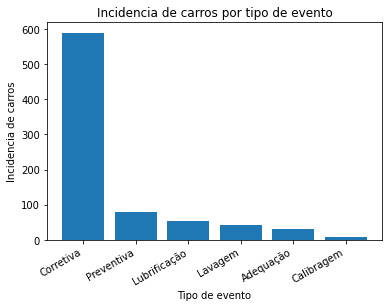

In [21]:
incidencia_event = []

for event in datasetTrat['tipo_de_evento'].unique():
    temp_size = len(datasetTrat[datasetTrat['tipo_de_evento'] == event])
    temp_ds = [event, temp_size]
    incidencia_event.append(temp_ds)

incidencia_event = pd.DataFrame(incidencia_event, columns=['tipo_de_evento', 'incidencia']).sort_values(by=['incidencia'], ascending=False)

fig, ax = plt.subplots()
ax.bar(incidencia_event.tipo_de_evento, incidencia_event.incidencia)
ax.set_title('Incidencia de carros por tipo de evento')
ax.set_xlabel('Tipo de evento')
ax.set_ylabel('Incidencia de carros')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

R: The most incidence in this repair shop.

### 2. What are the kilometer distributions for this kind of event?

C:\Users\pedro\AppData\Local\Temp\ipykernel_12272\2685896127.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


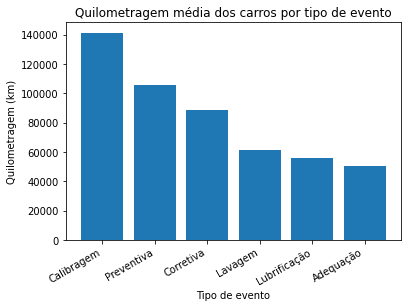

In [22]:
kilometer_event = []

for event in datasetTrat['tipo_de_evento'].unique():
    temp_km = datasetTrat[datasetTrat.tipo_de_evento == event]['km_atual'].mean()
    temp_ds = [event, temp_km]
    kilometer_event.append(temp_ds)
    
kilometer_event = pd.DataFrame(kilometer_event, columns=['tipo_de_evento', 'quilometragem_media']).sort_values(by=['quilometragem_media'], ascending=False)
kilometer_event

fig, ax = plt.subplots()
ax.bar(kilometer_event.tipo_de_evento, kilometer_event.quilometragem_media)
ax.set_title('Quilometragem média dos carros por tipo de evento')
ax.set_xlabel('Tipo de evento')
ax.set_ylabel('Quilometragem (km)')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
fig.show()

### 3. What is the distribution of "tipo_de_manutenção" for this event type?

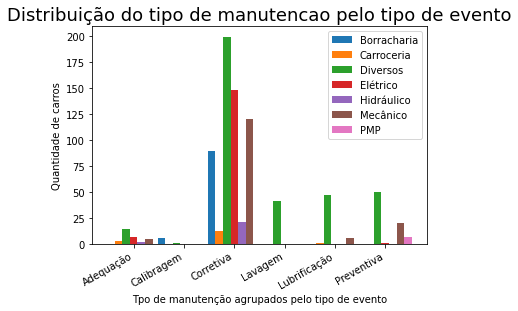

In [23]:
tipo_de_evento = datasetTrat['tipo_de_evento'].sort_values().unique()
tipo_de_manutencao = datasetTrat['tipo_de_manutencao'].sort_values().unique()

evento_manutencao = []
for i in tipo_de_evento:
    event_temp= []
    for j in tipo_de_manutencao:
        temp = len(datasetTrat[(datasetTrat.tipo_de_evento == i)&(datasetTrat.tipo_de_manutencao == j)])
        if np.isnan(temp):
            temp = 0 
        event_temp.append(temp)
        
    evento_manutencao.append(event_temp)

evento_manutencao = np.array(evento_manutencao).T

evento_manutencao = np.array_split(evento_manutencao, len(tipo_de_manutencao))

for i, v in enumerate(evento_manutencao):
    evento_manutencao[i] = evento_manutencao[i][0]

values=evento_manutencao
groups=tipo_de_evento
    
n = len(values)                # Number of bars to plot
w = .15                        # With of each column
x = np.arange(0, len(groups))   # Center position of group on x axis
fig, ax = plt.subplots()
for i, value in enumerate(values):
    position = x + (w*(1-n)/2) + i*w
    ax.bar(position, value, width=w, label=f'{tipo_de_manutencao[i]}')

plt.xticks(x, groups);
ax.set_title(f'Distribuição do tipo de manutencao pelo tipo de evento', fontsize=18)
ax.set_ylabel('Quantidade de carros')
ax.set_xlabel(f'Tpo de manutenção agrupados pelo tipo de evento')

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.legend()
plt.show()

R: The corrective event type, are those who present the most diversity related to maintenance. The first position is given to "diversos", the second to "Elétrico" and the third one to "Mecânico".

### 4. What event type, the hour meter is greater in average?

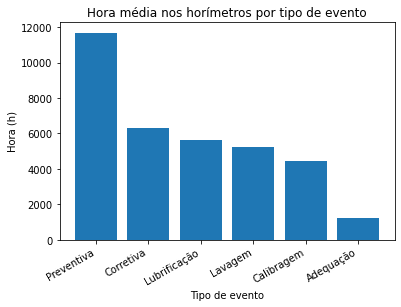

In [24]:
hr_event = []

for event in datasetTrat['tipo_de_evento'].unique():
    temp_hr = datasetTrat[datasetTrat.tipo_de_evento == event]['hr_atual'].mean()
    temp_ds = [event, temp_hr]
    hr_event.append(temp_ds)
    
hr_event = pd.DataFrame(hr_event, columns=['tipo_de_evento', 'hora_media']).sort_values(by=['hora_media'], ascending=False)

fig, ax = plt.subplots()
ax.bar(hr_event.tipo_de_evento, hr_event.hora_media)
ax.set_title('Hora média nos horímetros por tipo de evento')
ax.set_xlabel('Tipo de evento')
ax.set_ylabel('Hora (h)')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

R: The hour meter is greate in average in event types of "Preventivos", what does mean that the care of prevention is greather than correcting some problem what is counter intuitive once the corrective takes almost always more time.

### 5. What event type takes time longer?

C:\Users\pedro\AppData\Local\Temp\ipykernel_12272\3956954423.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


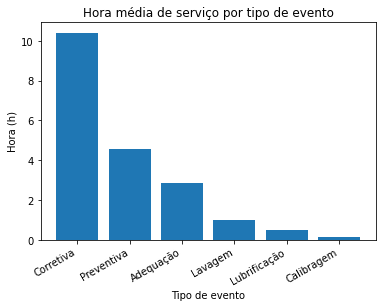

In [25]:
svt_event = []

for event in datasetTrat['tipo_de_evento'].unique():
    temp_time = (datasetTrat[datasetTrat.tipo_de_evento == event]['service_time']/np.timedelta64(1, "h")).mean()
    temp_ds = [event, temp_time]
    svt_event.append(temp_ds)
    
svt_event = pd.DataFrame(svt_event, columns=['tipo_de_evento', 'tempo_de_sv']).sort_values(by=['tempo_de_sv'], ascending=False)

fig, ax = plt.subplots()
ax.bar(svt_event.tipo_de_evento, svt_event.tempo_de_sv)
ax.set_title('Hora média de serviço por tipo de evento')
ax.set_xlabel('Tipo de evento')
ax.set_ylabel('Hora (h)')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
fig.show()

R: The event type that takes more time is the corrective one, with 10 hours in average by vehicle what is expected for this type of vehicle.

### 6. There is a maintenance pattern throughout the year independent of event type?

In [26]:
mth = {1: 'Jan', 
       2: 'Fev', 
       3: 'Mar', 
       4: 'Abr', 
       5: 'Mai', 
       6: 'Jun', 
       7: 'Jul', 
       8: 'Ago', 
       9: 'Set', 
       10: 'Out', 
       11: 'Nov', 
       12: 'Dez'}

years = {}
for i in datasetTrat.timestamp_entrada.dt.year.unique():
    temp_year = []
    for j in range(1,13):
        temp = len(datasetTrat[(datasetTrat.timestamp_entrada.dt.year == i) & (datasetTrat.timestamp_entrada.dt.month == j)])
        temp_year.append([mth[j],temp])
    temp_year = pd.DataFrame(temp_year, columns = ['meses', 'quantidade'])
    years[i] = temp_year

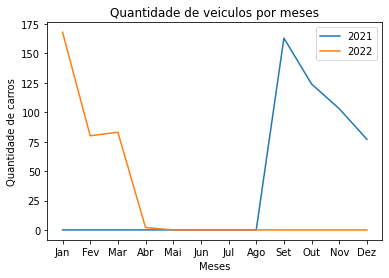

In [27]:
plt.plot(years[2021].meses, years[2021].quantidade, label='2021')
plt.plot(years[2022].meses, years[2022].quantidade, label='2022')
plt.title('Quantidade de veiculos por meses')
plt.xlabel('Meses')
plt.ylabel('Quantidade de carros')
plt.legend()
plt.show()

R: The only pattern dected was the steep drop of maintenance from april to august and an incresing after that. 

All the data was used only for trained so it is not expected to make sense with reality. What could be execised, was the cleaning skill and to put in practice what was learned in class.